# Kernel PCA Notebook

#### *Author: Kunyu He*
#### *University of Chicago, CAPP'20*

In [11]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

mpl.style.use("seaborn")

In [21]:
def actual_vs_predicted(ax, classifier, X, y, 
                        title=None, xlabel=None, ylabel=None,
                        postive_color="red", negative_color="green", edge_color="black",
                        postive_legend=None, negative_legend=None, legend_loc="best"):
    X1, X2 = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                         np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))

    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]
                                                    ).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap((negative_color,
                                                      postive_color)))
    ax.scatter(X[y == 0, 0], X[y == 0, 1], c=negative_color,
               label=negative_legend, edgecolors=edge_color, alpha=0.8)
    ax.scatter(X[y == 1, 0], X[y == 1, 1], c=postive_color,
               label=postive_legend, edgecolors=edge_color, alpha=0.8)
    
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())
    ax.set_title(title, fontdict={'fontsize': 15, 'fontweight': "bold"})
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.legend(frameon=True, framealpha=0.3, fancybox=True, fontsize=12,
              loc=legend_loc)

### Load Data

In [3]:
network = pd.read_csv("Social_Network_Ads.csv")
network.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


### Data Cleaning

In [4]:
network.shape

(400, 5)

In [5]:
network.isnull().sum(axis=0)

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

No missing data.

### Feature Selection

In [6]:
X = network.iloc[:, 2:4].values.astype(float)
X.shape

(400, 2)

In [7]:
y = network.Purchased.values.astype(float)
y.shape

(400,)

### Training and Test Set Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=123)

### Feature Scaling

In [9]:
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

### Feature Extraction - Kernel PCA

In [15]:
kernel_pca = KernelPCA(n_components=2, kernel='rbf', random_state=123)
X_train = kernel_pca.fit_transform(X_train)
X_test = kernel_pca.transform(X_test)

In [16]:
X_train.shape

(300, 2)

### Model Training

In [17]:
lrc = LogisticRegression(solver='lbfgs', random_state=123)
lrc.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Model Evaluation

In [18]:
test_pred = lrc.predict(X_test)

In [19]:
confusion_matrix(y_test, test_pred)

array([[58,  5],
       [ 7, 30]], dtype=int64)

Define a function that visualize the actual observation (scatters) against our predictions (regions).

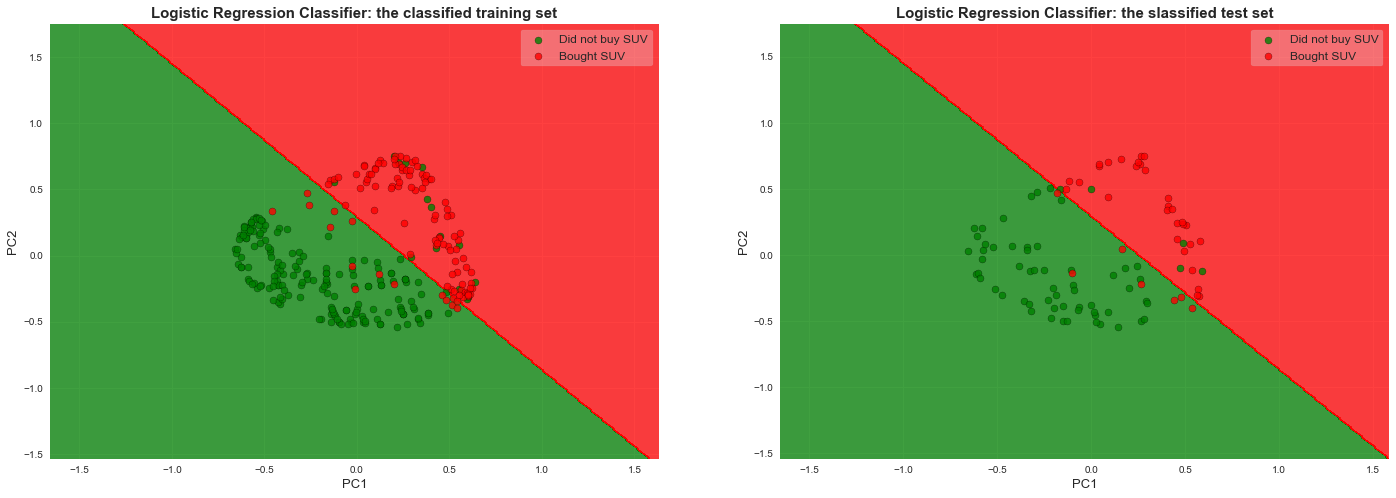

In [24]:
fig = plt.figure(figsize=[24, 8])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

actual_vs_predicted(ax1, lrc, X_train, y_train,
                    title="Logistic Regression Classifier: the classified training set",
                    xlabel="PC1", ylabel="PC2",
                    postive_legend="Bought SUV", negative_legend="Did not buy SUV")

actual_vs_predicted(ax2, lrc, X_test, y_test,
                    title="Logistic Regression Classifier: the slassified test set",
                    xlabel="PC1", ylabel="PC2",
                    postive_legend="Bought SUV", negative_legend="Did not buy SUV")

plt.show()